## Análisis para la región XVI

obs: Mantuve las preguntas del taller 2 para tener un notebook más completo


In [482]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point
import warnings
warnings.filterwarnings("ignore")

In [483]:
"Cargamos datos llevándolos al sistema de coordenadas geográficas 18s, EPSG:5361"

# Datos de Chile
red_hidrografica = gpd.read_file('Red_Hidrografica.gpkg').to_crs(crs = 'EPSG:5361')
territorios_op_sanitarias = gpd.read_file('Territorios_Operacionales_Sanitarias.gpkg').to_crs(crs = 'EPSG:5361')
apr = gpd.read_file('APR_Enero_2016/APR_DOH_Enero_2016.shp').to_crs(crs = 'EPSG:5361')


# Datos censales Región XVI
limites_regionales = gpd.read_file('Cartografia_Censal/REGION_C17.shp').to_crs(crs = 'EPSG:5361')
limites_comunales = gpd.read_file('Cartografia_Censal/COMUNA_C17.shp').to_crs(crs = 'EPSG:5361')
manzanas_urbanas = gpd.read_file('Cartografia_Censal/MANZANA_IND_C17.shp').to_crs(crs = 'EPSG:5361')
manzanas_rurales = gpd.read_file('Cartografia_Censal/MANZANA_ALDEA_C17.shp').to_crs(crs = 'EPSG:5361')
entidades_rurales = gpd.read_file('Cartografia_Censal/ENTIDAD_IND_C17.shp').to_crs(crs = 'EPSG:5361')
limite_urbano_censal = gpd.read_file('Cartografia_Censal/LIMITE_URBANO_CENSAL_C17.shp').to_crs(crs = 'EPSG:5361')




In [484]:
" Visualizamos las columnas de las distintas capas, descomentar aquella que sea de interés "

#red_hidrografica.columns
#territorios_op_sanitarias.columns
#apr.columns

#limites_regionales.columns
#limites_comunales.columns
manzanas_urbanas.columns
#manzanas_rurales.columns
#limite_urbano_censal.reset_index()



Index(['REGION', 'NOM_REGION', 'PROVINCIA', 'NOM_PROVIN', 'COMUNA',
       'NOM_COMUNA', 'DISTRITO', 'LOC_ZON', 'ENT_MAN', 'CATEGORIA',
       'NOM_CATEGO', 'MANZENT_I', 'TOTAL_PERS', 'TOTAL_VIVI', 'SHAPE_Leng',
       'SHAPE_Area', 'geometry'],
      dtype='object')

In [485]:
# Cruzamos las tablas red_hidrográfica, territorios op sanitarias y apr con la de límite regional de la XVI
# OBS: Puede tomar varios minutos (en mi pc son 5 min aprox)

red_hidrografica = gpd.overlay(red_hidrografica, limites_regionales[['REGION','geometry']], how='intersection')
territorios_op_sanitarias = gpd.overlay(territorios_op_sanitarias, limites_regionales[['REGION','geometry']], how='intersection')
apr = gpd.overlay(apr, limites_regionales[['REGION','geometry']], how='intersection')



In [486]:
# Generamos una columna de índices para las tablas

manzanas_urbanas = manzanas_urbanas.reset_index()
manzanas_rurales = manzanas_rurales.reset_index()
red_hidrografica = red_hidrografica.reset_index()
entidades_rurales = entidades_rurales.reset_index()
apr = apr.reset_index()

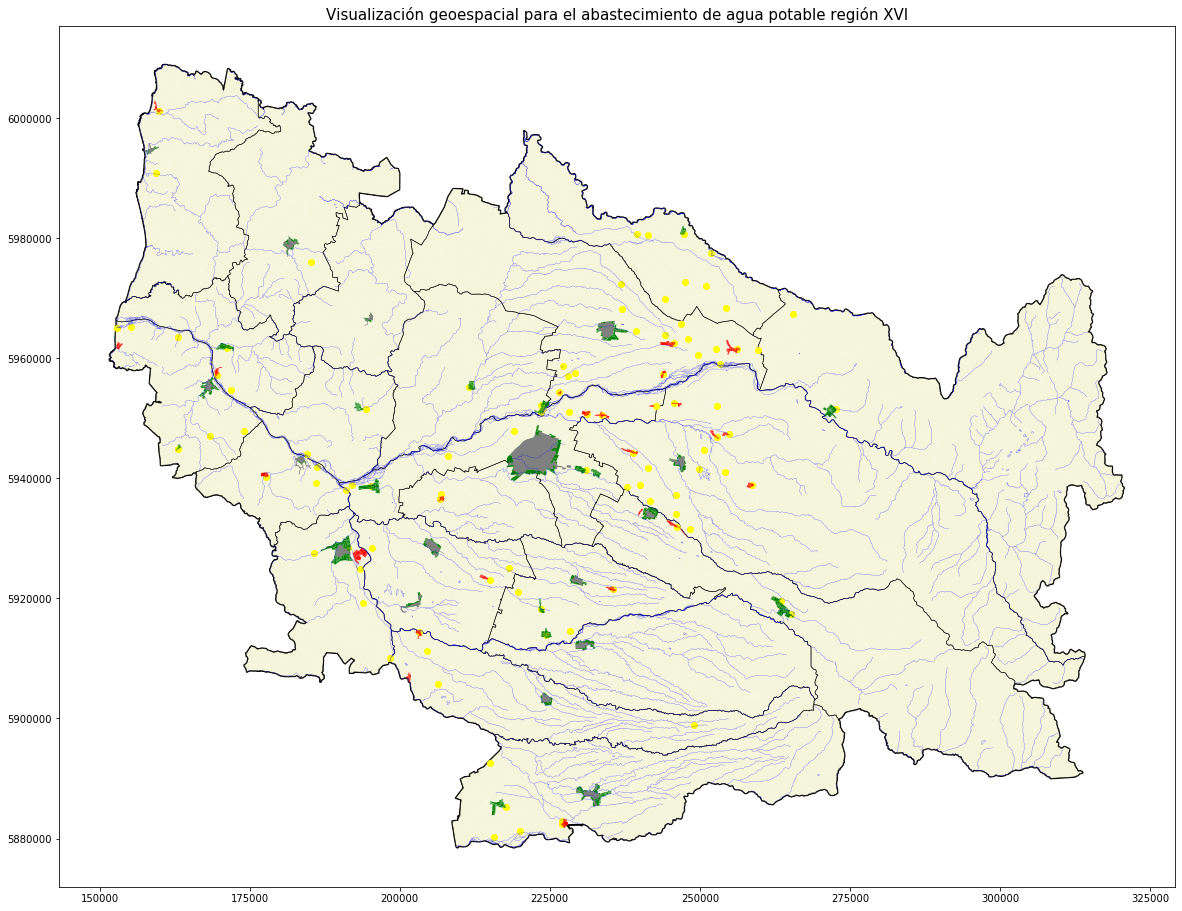

In [487]:
"Generamos un plot de las distintas capas"

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
ax.set_title('Visualización geoespacial para el abastecimiento de agua potable región XVI', fontsize=15)


red_hidrografica.plot(ax=ax, color = 'blue', lw = 0.2)
limites_regionales.plot(ax=ax, color='None', edgecolor='k', lw=2)
entidades_rurales.plot(ax=ax, color='beige')
limites_comunales.plot(ax=ax, color='None', edgecolor='k', lw=0.5)

apr.plot(ax=ax, color = 'yellow', legend = 'APR')
manzanas_urbanas.plot(ax=ax, color='green')
manzanas_rurales.plot(ax=ax, color='red')
territorios_op_sanitarias.plot(ax=ax, color = "gray")

plt.show()

## Código para responder a las preguntas del taller:
A continuación se muestra el código utilizado para responder a las preguntas del taller

In [488]:
print(f"Área total región de Ñuble:  {limites_regionales['SHAPE_Area'].sum() * 1000000} ha")

Área total región de Ñuble:  1319390.70467 ha


In [489]:
print(f"Área total entidades rurales:  {entidades_rurales['SHAPE_Area'].sum() * 1000000} ha")
print("Número de personas total entidades rurales: ", entidades_rurales['TOTAL_PERS'].sum())

Área total entidades rurales:  1305209.8736573693 ha
Número de personas total entidades rurales:  146929


In [490]:
print(f"Área total manzanas rurales:  {manzanas_rurales['SHAPE_Area'].sum() * 1000000} ha")

Área total manzanas rurales:  1888.901111370658 ha


In [491]:
print(f"Área total límite urbano censal: {limite_urbano_censal['SHAPE_Area'].sum() * 1000000} ha")


Área total límite urbano censal: 13905.9359346973 ha


In [492]:
print(f"Área total manzanas urbanas:  {manzanas_urbanas['SHAPE_Area'].sum() * 1000000} ha")
print('Número de personas total manzanas urbanas: ', manzanas_urbanas['TOTAL_PERS'].sum())

Área total manzanas urbanas:  12643.300545707178 ha
Número de personas total manzanas urbanas:  332399


# En resumen:

|           Dato                 |  Magnitud  |
|:--------------------------:|:----------:|
| Área región XVI:           | 1319390 ha |
| Área entidades rurales:    | 1305209 ha |
| Área manzanas rurales:     | 1888 ha    |
| Área límite urbano censal: | 13905 ha   |
| Área manzanas urbanas:     | 12643 ha   |
| Personas en zonas rurales: | 146929     |
| Personas en zonas urbanas: | 332399     |


## Resolución preguntas Tarea 1:

## Pregunta 1:

In [493]:
import pandas as pd

# Definimos función que retorna la apr más cercana a una geometría (en este caso manzana urbana)

def closest_apr(geom, aprs):
    dist = aprs.distance(geom)
    idx = dist.idxmin()
    closest_apr = apr.loc[idx, 'index']
    return pd.Series({'closest_apr': closest_apr, 'dist': dist[idx]})


In [494]:
# Aplicamos la función a la tabla manzanas urbanas y agregamos las columnas closest_apr y dist

df = manzanas_urbanas.geometry.apply(closest_apr, aprs=apr)
manzanas_urbanas['closest_apr'] = df['closest_apr']
manzanas_urbanas['dist'] = df['dist']

In [495]:
# Obtenemos manzanas urbanas con acceso a apr (dist <= 5km)

manzanas_urbanas_apr = manzanas_urbanas[manzanas_urbanas['dist'] <= 5000].reset_index(drop = True)

In [496]:
# Obtenemos manzanas urbanas con cobertura sanitarias de agua potable

manzanas_urbanas_sanitarias = gpd.overlay(manzanas_urbanas, territorios_op_sanitarias[['geometry']], 
                                          how = 'intersection')

In [497]:
# Unimos ambas tablas eliminando filas duplicadas para obtener las manzanas urbanas con cobertura de agua potable

manzanas_urbanas_con_cobertura = pd.concat([manzanas_urbanas_apr, manzanas_urbanas_sanitarias]).drop_duplicates(subset = 'index').reset_index(drop = True)

In [498]:
porcentaje_manzanas_urbanas_con_cobertura = (len(manzanas_urbanas_con_cobertura) / len(manzanas_urbanas)) * 100
print(f"El porcentaje de manzanas urbanas con acceso agua potable es: {porcentaje_manzanas_urbanas_con_cobertura} %")

El porcentaje de manzanas urbanas con acceso agua potable es: 97.76467698354213 %


## Pregunta 2:

In [499]:
# Efectuamos el operador diferencia entre manzanas urbanas y manzanas urbanas con cobertura para obtener las manzanas sin cobertura

manzanas_urbanas_sin_cobertura = manzanas_urbanas[~manzanas_urbanas['index'].isin(manzanas_urbanas_con_cobertura['index'])].reset_index(drop = True)

In [500]:
habitantes_urbanos_sin_cobertura = manzanas_urbanas_sin_cobertura['TOTAL_PERS'].sum()
viviendas_urbanas_sin_cobertura = manzanas_urbanas_sin_cobertura['TOTAL_VIVI'].sum()
print(f"La cantidad de habitantes en manzanas urbanas sin acceso a agua potable es: {habitantes_urbanos_sin_cobertura} ")
print(f"La cantidad de viviendas en manzanas urbanas sin acceso a agua potable es: {viviendas_urbanas_sin_cobertura} ")


La cantidad de habitantes en manzanas urbanas sin acceso a agua potable es: 3778 
La cantidad de viviendas en manzanas urbanas sin acceso a agua potable es: 1514 


## Pregunta 3:

In [501]:
# Obtenemos en primer lugar las entidades rurales con acceso a APR

entidades_rurales_con_apr = gpd.overlay(entidades_rurales, apr[['geometry']], how = 'intersection')

In [502]:
# Obtenemos ahora las entidades rurales sin acceso a APR

entidades_rurales_sin_apr = entidades_rurales[~entidades_rurales['index'].isin(entidades_rurales_con_apr['index'])].reset_index(drop = True)

In [503]:
# Obtenemos la información requerida para las entidades rurales sin apr

habitantes_rurales_sin_cobertura = entidades_rurales_sin_apr['TOTAL_PERS'].sum()
viviendas_rurales_sin_cobertura = entidades_rurales_sin_apr['TOTAL_VIVI'].sum()
print(f"La cantidad de habitantes en entidades rurales sin acceso a agua potable es: {habitantes_rurales_sin_cobertura} ")
print(f"La cantidad de viviendas en entidades rurales sin acceso a agua potable es: {viviendas_rurales_sin_cobertura} ")


La cantidad de habitantes en entidades rurales sin acceso a agua potable es: 146929 
La cantidad de viviendas en entidades rurales sin acceso a agua potable es: 67799 


## Pregunta 4

In [504]:
# Definimos la función para obtener la distancia del centroide de una entidad urbana a la red hidrográfica

def nearest_water_source(geom, redh):
    dist = redh.distance(geom)
    idx = dist.idxmin()
    nearest = redh.loc[idx, ['index', 'tipo']]
    return pd.Series({'id_nearest_water_source': nearest['index'], 'tipo_nearest_water_source': nearest['tipo'], 'dist': dist[idx]})


In [505]:
# Aplicamos la función a las entidades rurales sin apr

table = entidades_rurales_sin_apr.geometry.centroid.apply(nearest_water_source, redh=red_hidrografica)
entidades_rurales_sin_apr['id_nearest_water_source'] = table['id_nearest_water_source']
entidades_rurales_sin_apr['tipo_nearest_water_source'] = table['tipo_nearest_water_source']
entidades_rurales_sin_apr['dist'] = table['dist']


In [506]:
# En las últimas dos columnas está la información requerida

entidades_rurales_sin_apr

,index,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,DISTRITO,LOC_ZON,ENT_MAN,...,NOM_CATEGO,MANZENT_I,TOTAL_PERS,TOTAL_VIVI,SHAPE_Leng,SHAPE_Area,geometry,id_nearest_water_source,tipo_nearest_water_source,dist
0,0,16,REGIÓN DE ÑUBLE,162,ITATA,16202,COBQUECURA,2,34,901,...,Indeterminada,16202022034901,20,8,0.107889,0.000334,"MULTIPOLYGON (((160268.996 5998146.495, 160390...",130,Estero,1289.005963
1,1,16,REGIÓN DE ÑUBLE,162,ITATA,16202,COBQUECURA,2,41,901,...,Indeterminada,16202022041901,11,11,0.077064,0.000189,"MULTIPOLYGON (((157896.748 5996137.163, 157881...",1022,Costa,1048.507171
2,2,16,REGIÓN DE ÑUBLE,162,ITATA,16202,COBQUECURA,3,24,901,...,Indeterminada,16202032024901,16,6,0.081141,0.000346,"POLYGON ((166064.102 5993504.853, 166074.963 5...",130,Estero,2995.263936
3,3,16,REGIÓN DE ÑUBLE,162,ITATA,16202,COBQUECURA,3,53,901,...,Indeterminada,16202032053901,113,104,0.171965,0.000481,"POLYGON ((157764.547 5989752.879, 157795.131 5...",136,Estero,681.989089
4,4,16,REGIÓN DE ÑUBLE,162,ITATA,16202,COBQUECURA,4,901,901,...,Indeterminada,16202042901901,18,33,0.480637,0.004338,"MULTIPOLYGON (((156831.209 5973081.396, 157440...",175,Estero,1749.996305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,1886,16,REGIÓN DE ÑUBLE,161,DIGUILLÍN,16109,YUNGAY,6,50,87,...,Caserío,16109062050087,22,19,0.026668,0.000041,"POLYGON ((258021.770 5887787.203, 258014.902 5...",2091,Río,270.078582
1887,1887,16,REGIÓN DE ÑUBLE,161,DIGUILLÍN,16109,YUNGAY,10,53,92,...,Campamento,16109102053092,13,1,0.022065,0.000024,"POLYGON ((226223.302 5880009.943, 226183.254 5...",938,Río,149.599453
1888,1888,16,REGIÓN DE ÑUBLE,161,DIGUILLÍN,16109,YUNGAY,9,5,17,...,Aldea,16109092005017,184,63,0.046836,0.000078,"POLYGON ((227833.783 5883125.014, 227833.428 5...",926,Río,535.049007
1889,1889,16,REGIÓN DE ÑUBLE,161,DIGUILLÍN,16109,YUNGAY,10,5,17,...,Aldea,16109102005017,155,65,0.024498,0.000022,"POLYGON ((227493.737 5882227.243, 227496.082 5...",926,Río,1035.409324


## Pregunta 5

In [507]:
# Tabla entidades que deben ser abastecidas por camiones aljibe

entidades_rurales_camiones = entidades_rurales_sin_apr[entidades_rurales_sin_apr['dist'] > 1000]

In [508]:
# Obtenemos a las personas que se encuentran a una distancia mayor de 1 km a una fuente de agua

cantidad_personas = entidades_rurales_camiones['TOTAL_PERS'].sum()
print(f"La cantidad de habitantes en entidades rurales que deben ser abastecidos por camión aljibe es: {cantidad_personas} ")


La cantidad de habitantes en entidades rurales que deben ser abastecidos por camión aljibe es: 58508 


## Pregunta 6

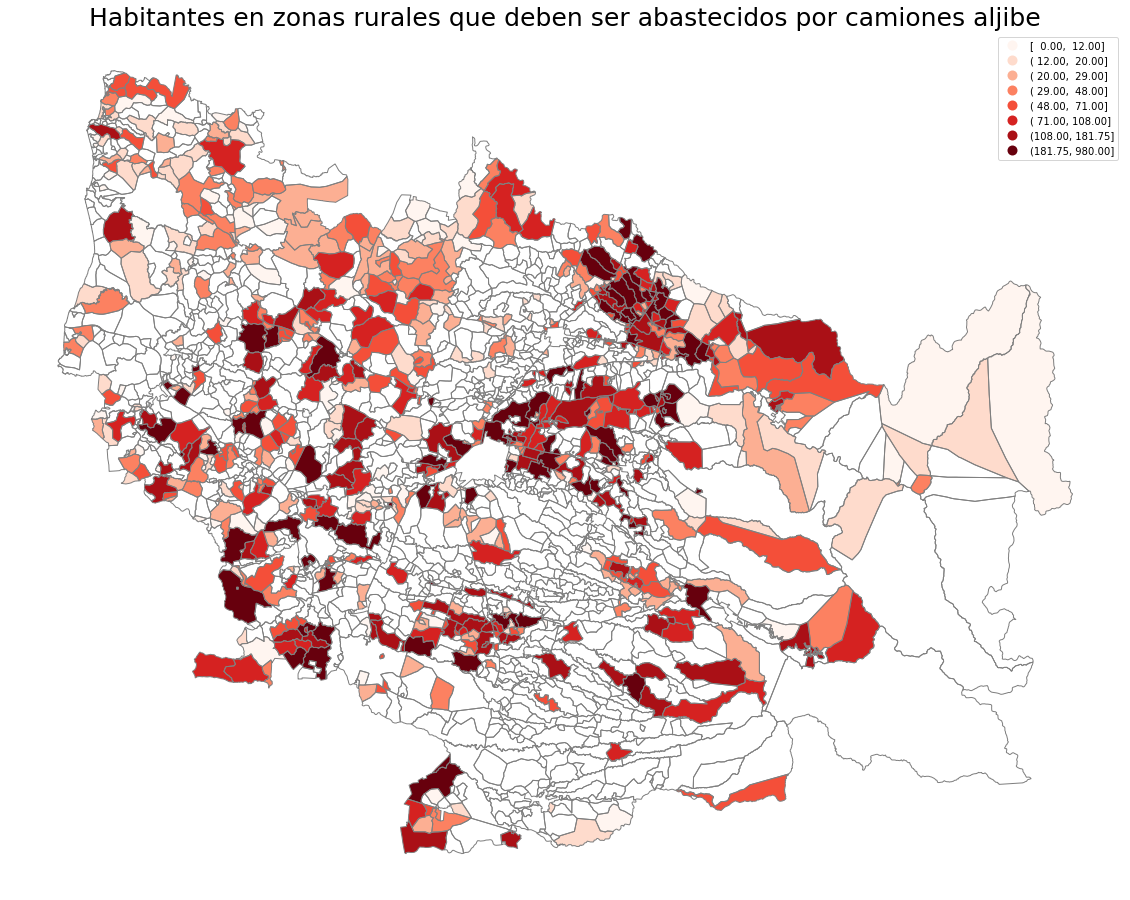

In [509]:
variable = 'TOTAL_PERS'

fig, ax = plt.subplots(1, figsize=(20, 20))
entidades_rurales_camiones.plot(ax=ax, column=variable, cmap='Reds', scheme='quantiles', k=8 ,legend = True)
entidades_rurales.plot(ax = ax, color = 'None', edgecolor='gray')
ax.set_title('Habitantes en zonas rurales que deben ser abastecidos por camiones aljibe', fontdict={'fontsize': 25, 'fontweight' :  30, 'color': 'black'})
ax.axis('off')
plt.show()